In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
import pandas as pd
import vice
from scipy.interpolate import interp1d
from scipy.integrate import quad
import arya
from surp.analysis.vice_model import vice_model
from surp.analysis import apogee_analysis as aah
import seaborn as sns

In [73]:
arya.style.set_size((10/3, 10/3/np.sqrt(2)))

sns.set_style("ticks")

sns.set_style({
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'axes.splines.top': True,
    'axes.splines.right': True,
    'image.cmap': 'arya',
})
plt.rcParams["figure.dpi"] = 200

In [7]:
fiducial = vice_model("../out/C11_f0.2_eta1_beta0.001.json")

(-0.3, 0.1)

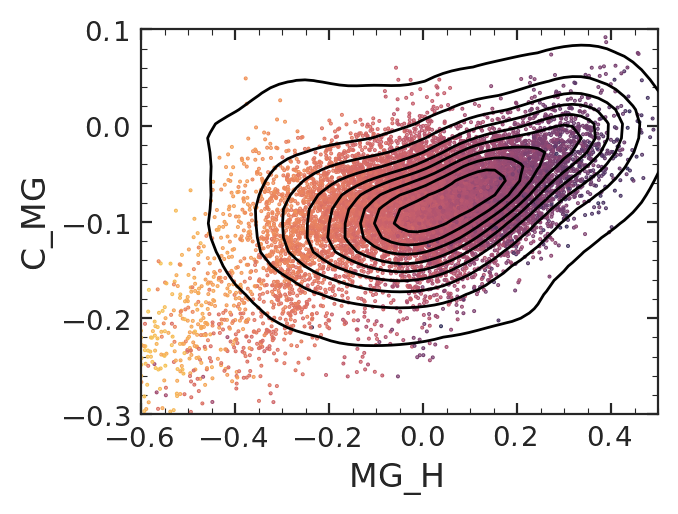

In [63]:
s = fiducial.stars
N = len(s)
dx = 0.03
dy = 0.03
aah.plot_contour("[mg/h]", "[c/mg]", zorder=3)

plt.scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2)
plt.xlim(-0.6, 0.5)
plt.ylim(-0.3, 0.1)

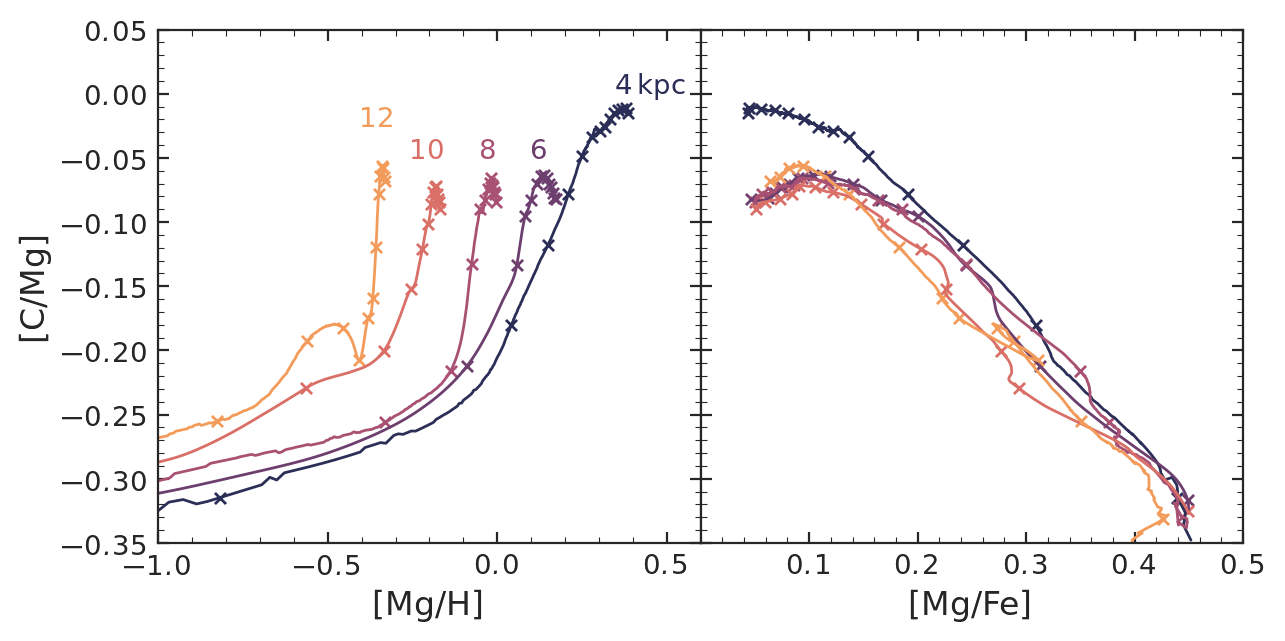

In [61]:

fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3))

plt.sca(axs[0])
fiducial.plot_R_slices("[mg/h]", "[c/mg]", legend=False)

colors = plt.get_cmap()(np.linspace(0.8, 0, 5))

coords = [
    (-0.4, -0.025),
    (-0.25, -0.05),
    (-0.05, -0.05),
    (0.1, -0.05),
    (0.35, 0.0)
]

texts = [
    "12",
    "10",
    "8",
    "6",
    r"4\,kpc"
]
for i in range(5):
    plt.text(*coords[i], texts[i], color=colors[i])

plt.xlabel(r"[Mg/H]")
plt.ylabel(r"[C/Mg]")
plt.xlim(-1, 0.6)
plt.ylim(-0.35, 0.05)


plt.sca(axs[1])
fiducial.plot_R_slices("[mg/fe]", "[c/mg]", legend=False)

plt.xlabel(r"[Mg/Fe]")
plt.ylabel("")
plt.xlim(0, 0.5)
plt.ylim(-0.35, 0.05)
plt.xticks(np.arange(0.1, 0.6, 0.1))

plt.savefig("evo_tracks.pdf")

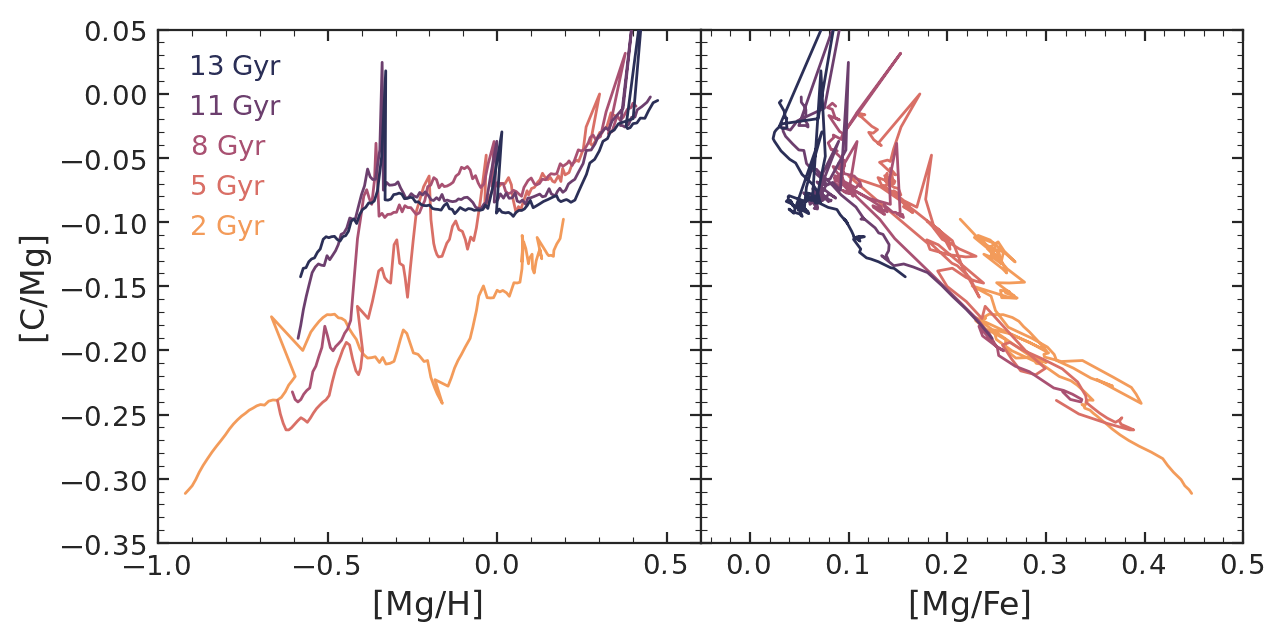

In [72]:
fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3))

plt.sca(axs[0])
fiducial.plot_t_slices("[mg/h]", "[c/mg]")




plt.xlabel(r"[Mg/H]")
plt.ylim(-0.35, 0.05)
plt.ylabel(r"[C/Mg]")
plt.xlim(-1, 0.6)

plt.sca(axs[1])


fiducial.plot_t_slices("[mg/fe]", "[c/mg]",legend=False)



plt.xlabel(r"[Mg/Fe]")
plt.ylabel("")
plt.xlim(-0.05, 0.5)

plt.savefig("evo_slices.pdf")

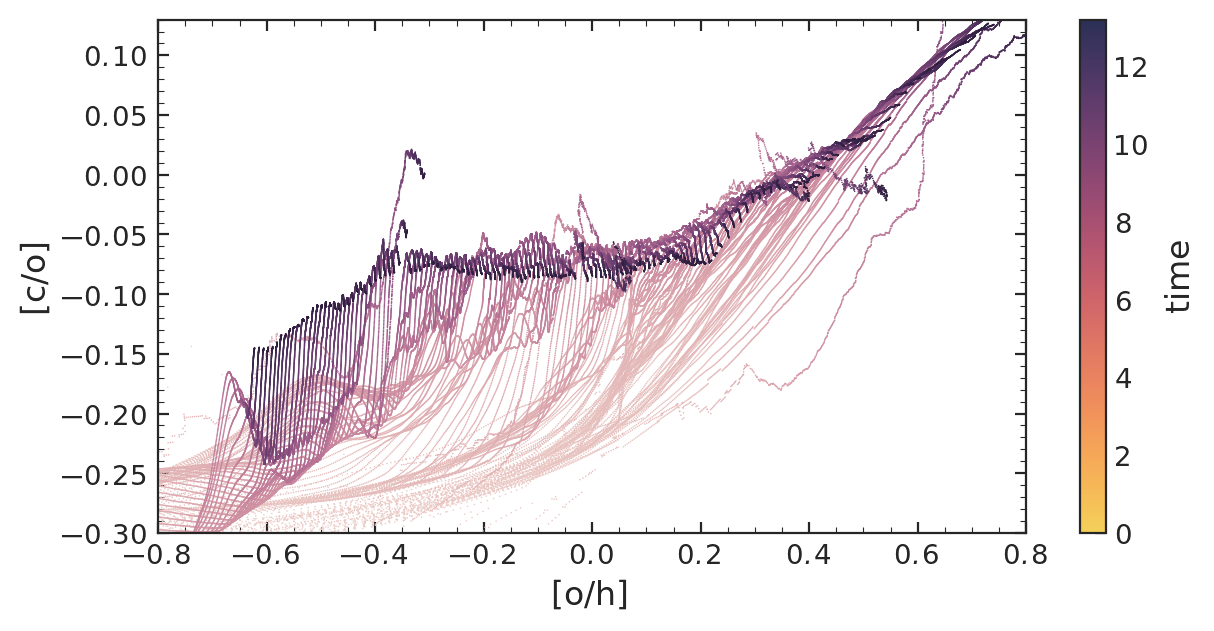

In [100]:
plt.figure(figsize=(7, 10/3))
df = fiducial.history

sns.scatterplot(df, x="[o/h]", y="[c/o]", hue="time", s=0.3, alpha=1, legend=False, edgecolor="none")
plt.xlim(-0.8, 0.8)
plt.ylim(-0.3, 0.13)
arya.Colorbar(clim=(0, 13.2), label="time", cmap="arya_r")

plt.savefig("all_the_tracks.pdf")

In [99]:
df[np.isclose(df.R, 11.95)]

,time,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),...,[n/o],[n/mg],[c/fe],[c/o],[c/mg],[c/n],z,[m/h],lookback,R
157199,0.00,1.000000e-12,0.000000e+00,0.000000,NaN,1.170862e-316,5.084539,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,13.20,11.95
157200,0.01,6.406385e+06,6.906955e+02,0.000076,0.641103,3.883827e-04,5.084539,0.095771,0.0,0.0,...,-0.400841,-0.400512,0.127931,-0.322173,-0.321844,0.078668,0.000003,-3.619207,13.19,11.95
157201,0.02,9.633845e+06,1.991741e+03,0.000152,0.323666,7.745231e-04,5.084539,0.118708,0.0,0.0,...,-0.400841,-0.400513,0.127956,-0.322148,-0.321820,0.078693,0.000007,-3.320312,13.18,11.95
157202,0.03,1.223173e+07,3.882089e+03,0.000228,0.261157,1.158433e-03,5.084539,0.134042,0.0,0.0,...,-0.400841,-0.400512,0.127980,-0.322123,-0.321795,0.078717,0.000011,-3.124032,13.17,11.95
157203,0.04,1.449043e+07,6.330666e+03,0.000303,0.227683,1.540125e-03,5.084539,0.145422,0.0,0.0,...,-0.400841,-0.400512,0.128007,-0.322096,-0.321768,0.078744,0.000015,-2.976856,13.16,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158515,13.16,8.436166e+07,6.490573e+07,0.009108,0.050925,4.631090e-02,5.084539,0.409131,0.0,0.0,...,-0.179753,-0.182550,-0.020403,-0.079176,-0.081973,0.100577,0.006022,-0.366367,0.04,11.95
158516,13.17,8.436058e+07,6.369618e+07,0.009105,0.051563,4.629297e-02,5.084539,0.439682,0.0,0.0,...,-0.179534,-0.182337,-0.020462,-0.079117,-0.081920,0.100417,0.006023,-0.366343,0.03,11.95
158517,13.18,8.435949e+07,6.269986e+07,0.009101,0.051265,4.627504e-02,5.084539,0.411467,0.0,0.0,...,-0.179519,-0.182322,-0.020477,-0.079083,-0.081886,0.100436,0.006023,-0.366321,0.02,11.95
158518,13.19,8.435840e+07,6.275209e+07,0.009098,0.051501,4.625713e-02,5.084539,0.425927,0.0,0.0,...,-0.179573,-0.182374,-0.020486,-0.079075,-0.081875,0.100498,0.006023,-0.366329,0.01,11.95


In [97]:
df[np.isclose(df.R, 12.05)]

,time,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),...,[n/o],[n/mg],[c/fe],[c/o],[c/mg],[c/n],z,[m/h],lookback,R
158520,0.00,1.000000e-12,0.000000e+00,0.000000,NaN,-1.422099e+170,5.190222,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.20,12.05
158521,0.01,6.301610e+06,6.676958e+02,0.000074,0.630618,-1.422099e+170,5.190222,0.095771,0.0,0.0,...,inf,inf,-inf,NaN,NaN,-inf,2.923266e-07,-4.680260,13.19,12.05
158522,0.02,9.476297e+06,1.928982e+03,0.000147,0.318373,7.642962e-04,5.190222,0.118846,0.0,0.0,...,inf,inf,-0.048472,inf,inf,0.378339,1.031475e-06,-4.132669,13.18,12.05
158523,0.03,1.203171e+07,3.763381e+03,0.000220,0.256887,1.143139e-03,5.190222,0.134271,0.0,0.0,...,5.480262,5.480591,0.048516,5.655633,5.655962,0.175371,1.968753e-06,-3.851937,13.17,12.05
158524,0.04,1.425350e+07,6.140720e+03,0.000293,0.223962,1.519795e-03,5.190222,0.145720,0.0,0.0,...,-0.398968,4.742602,0.081993,0.030637,5.172207,0.429604,6.768301e-06,-3.315648,13.16,12.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159836,13.16,8.414036e+07,6.772974e+07,0.008829,0.050444,4.582486e-02,5.190222,0.398289,0.0,0.0,...,-0.101610,-0.083518,0.092128,0.001485,0.019577,0.103095,6.613179e-03,-0.325718,0.04,12.05
159837,13.17,8.413933e+07,6.779639e+07,0.008826,0.051014,4.580722e-02,5.190222,0.468426,0.0,0.0,...,-0.100771,-0.082704,0.091444,0.000672,0.018740,0.101443,6.613848e-03,-0.325674,0.03,12.05
159838,13.18,8.413830e+07,6.720744e+07,0.008822,0.050374,4.578958e-02,5.190222,0.397791,0.0,0.0,...,-0.102676,-0.085039,0.090696,0.000263,0.017901,0.102940,6.609141e-03,-0.325983,0.02,12.05
159839,13.19,8.413726e+07,6.725842e+07,0.008819,0.050977,4.577195e-02,5.190222,0.421854,0.0,0.0,...,-0.104695,-0.087479,0.089985,-0.000126,0.017090,0.104569,6.604059e-03,-0.326317,0.01,12.05


one file saved at ./mg_fe_scatter.pdf


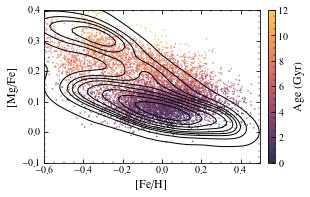

In [15]:

model = vice_model("../output/C11_f0.2_eta1_beta0.001_twoexp0.3.json")
s = model.stars["solar"]

N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[fe/h]", "[mg/fe]", ax=sp.mpl_ax, zorder=3, exclude_high_alpha=False)

scat = arya.Scatter(s["[fe/h]"] + np.random.normal(0, dx, N), s["[mg/fe]"] + 0.05 + np.random.normal(0, dy, N), 
             c = s["age"], s=0.2, zorder=2, subplot=sp)

scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1,  width=arya.Length(0.05*height))
cb.label = "Age (Gyr)"


sp.x.label=r"[Fe/H]"
sp.y.label=r"[Mg/Fe]"
sp.x.lim=(-0.6, 0.5)
sp.y.lim=(-0.1, 0.4)

sp.save("mg_fe_scatter.pdf")